# Señales

<div class="alert alert-block alert-warning">
Este notebook es parte de una colección de apuntes para el curso IEE2103 Señales y Sistemas, <a href="http://https://www.ing.uc.cl/electrica/">Departamento de Ingeniería Eléctrica</a>, <a href="http://www.uc.cl">Pontificia Universidad Católica de Chile</a>.<br> Profesor: <a href="http://www.rodrigocadiz.com">Rodrigo F. Cádiz</a><br>
Consultas y comentarios: <a href="mailto:rcadiz@ing.puc.cl">rcadiz@ing.puc.cl</a>

</div>

***

## Concepto de señal

- Contiene información
- Función de una variable independiente (espacio: $x$, tiempo: $t$)
- La forma en que la señal evoluciona respecto a la variable independiente codifica la información


**Ejemplos:**

- Voltaje o corriente en un circuito electrónico
- Voz o música
- Imágenes
- Señales bioeléctricas (EEG)
- Variación de la bolsa (IPSA)

### Tipos de señales

Las señales pueden clasificarse de varias formas:
- Continuas vs discretas
- De energía o de potencia
- Físicas vs lógicas
- Periódicas vs no-periódicas



### Señales continuas

- Señal que tiene valores para todos los puntos de la variable independiente.
- No confundir con continuidad matemática.
- Pueden ser, matemáticamente, continuas o discontinuas.
- Una señal que presenta un número finito o infinito numerable de discontinuidades se considera continua por tramos, siempre y cuando el salto en la amplitud sea finito.
- En los puntos de discontinuidad el valor de la función tiende a ser el valor medio.


### Señales discretas

- Señal que toma valores sólo para puntos específicos en la variable independiente
- Típicamente se obtienen mediante el muestreo de una señal contínua (audio o imagen digital)
- También se denominan secuencias


<div class="alert alert-block alert-danger">
    <h3>Tiempo Discreto ≠ Digital</h3>
<ul><li>Las secuencias de tiempo discreto son continuas en sus valores y discretas en el tiempo
<li>Las señales digitales son discretas en sus valores y discretas en el tiempo (sólo pueden tomar un número determinado de valores)</ul>
</div>





**Ejemplo**

En el siguiente código se pueden observar dos señales, una discreta y otra continua, que tienen la misma forma. Sin embargo, mientras la versión continua posee un valor para cada valor de la variable independiente, la señal discreta sólo está definida en ciertos lugares de la variable independiente. Las funciones son

- $x[n] = (1/2)^n$
- $x(t) = (1/2)^t$

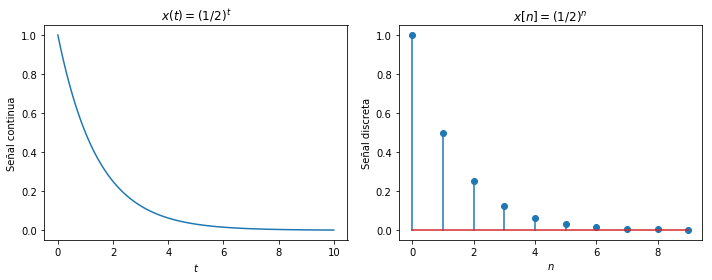

In [1]:
# Ejemplo de señales continuas y discretas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = np.arange(10)
t = np.linspace(0,10,100)

def continuous_signal(a,t):
    return np.power(a,t)

def discrete_signal(a,n):
    return np.power(a,n)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(t, continuous_signal(0.5,t))
plt.xlabel('$t$')
plt.ylabel('Señal continua')
plt.title('$x(t) = (1/2)^t$')

plt.subplot(122)
plt.stem(n, discrete_signal(0.5,n))
plt.xlabel('$n$')
plt.ylabel('Señal discreta')
plt.title('$x[n] = (1/2)^n$')

plt.tight_layout()
    

### Señales periódicas

Una señal periódica, de período $\tau$, cumple con

$x(t) = x(t+\tau)$

Esto implica que la señal se repite en forma exacta cada cierta unidad de la variable independiente. Las señales periódicas cumplen un rol fundamental en este curso. 

**Ejemplo**:

El clásico ejemplo de una señal periódica es una sinusoide:


In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

def plot_func(period):
    x = np.linspace(0, 2*np.pi,1000)
    y = np.sin(2*np.pi* x / period) 
    t = "sin(2$\pi$ %.1f x)" %(period)
    plt.title(t)
    plt.plot(x, y)
    plt.xlim(0, 1)
    plt.ylim(-1, 1)    
    plt.xlabel('x')
    plt.xticks([0,1],['$0$','$1$'])
    plt.yticks([-1,0,1],['$-1$','$0$','$1$'])
    
slider_period = widgets.FloatSlider(value=1,min=0.01,max=15.,step=0.1)   

interact(plot_func, period=slider_period)

interactive(children=(FloatSlider(value=1.0, description='period', max=15.0, min=0.01), Output()), _dom_classe…

<function __main__.plot_func(period)>

### Señales aperiódicas

Una señal aperiódica, o no periódica no exhibe repeticiones de ningún tipo. 

**Ejemplo:**

Un buen ejemplo de una señal aperiódica es el ruido blanco.

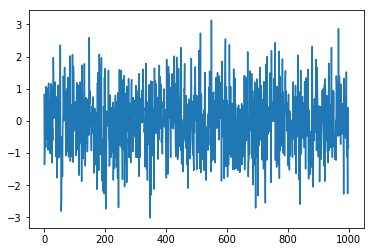

In [5]:
import numpy
import matplotlib.pyplot as plt

mean = 0
std = 1 
num_samples = 1000
samples = numpy.random.normal(mean, std, size=num_samples)

plt.plot(samples)
plt.show()

***
## Simetrías de señales

La simetría de las señales juega un rol muy importante en el análisis de señales y en especial en la Series y Transformadas de Fourier.

Sea $f:\mathbb{R}\rightarrow\mathbb{R}$ una señal real, descrita por una función real y $\phi:\mathbb{R}\rightarrow\mathbb{C}$ una señal compleja, descrita por una función compleja, en términos de la variable independiente $x$. Denotaremos el complejo conjugado de $\phi$ mediante $\phi^{*}$.

$f$ es par, si cumple con:

$$ f(-x) = f(x) $$

$f$ es impar, si se verifica:

$$ f(-x) = -f(x) $$

Si $f$ no exhibe ninguna simetría (par o impar) se dice que es una función asimétrica. Una función asimétrica se puede expresar como la suma de una parte par $f_e$ y una parte impar $f_o$:

$$f(x) = f_e(x) + f_o(x)$$

Dada una función $f$, su parte par se puede calcular como 

$$f_e(x) = \frac{f(x) + f(-x)}{2} $$

y su parte impar:

$$f_o(x) = \frac{f(x) - f(-x)}{2} $$

$\phi$ es hermitiana si

$$ \phi(-x) = \phi^{*}(x) $$ 

Este tipo de señales tiene parte real par y parte imaginaria impar. $\phi$ es anti-hermitiana si tiene parte real impar y parte imaginaria par.










<div class="alert alert-block alert-warning">
<b>Copyright</b><br>

Estos apuntes están licenciados bajo la licencia <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0</a>.<br>
Como citar: <i>Rodrigo F. Cádiz, Apuntes de Señales y Sistemas.</i>
</div>